### Scraping Text

In [1]:
# cara membuat virtual environment
'''
conda create -n fuzzy python==3.11
'''

# cara mengaktifkan virtual environment
'''
conda activate fuzzy
'''

# jangan lupa install nb_conda_kernels dan ipykernel
'''
conda install nb_conda_kernels ipykernel
'''

# install dependensi yg kamu perlukan
'''
pip install google-play-scraper lxml
conda install numpy pandas nltk scikit-learn
'''


'\npip install google-play-scraper lxml\nconda install numpy pandas nltk scikit-learn\n'

In [2]:
from google_play_scraper import app
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree, metrics
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Saintek19\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Saintek19\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
from google_play_scraper import Sort, reviews_all

result = reviews_all('com.qianfan.aihomework',
                     sleep_milliseconds=0, lang='id',
                     country='id', sort=Sort.NEWEST,
                     filter_score_with=None)

In [4]:
df_busu = pd.DataFrame(np.array(result), columns=['review'])
df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))
df_busu

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,550be418-85b4-40e4-a132-58fec532f2f0,Kevin Ditto,https://play-lh.googleusercontent.com/a-/ALV-U...,"Ga disangka, kemudahan teknologi jaman sekaran...",5,27,1.8.8,2023-10-24 23:34:58,None,NaT,1.8.8
1,97742338-5150-4dc9-8e80-4f998e5c89de,Adam Gusti Andito,https://play-lh.googleusercontent.com/a-/ALV-U...,"Disamping perkembangan zaman, karena aplikasi ...",5,21,1.8.8,2023-10-25 05:29:30,None,NaT,1.8.8
2,3b9645ef-a99e-4e64-a5c9-a54824740ea8,Dominikus Tripuspa Mahardika,https://play-lh.googleusercontent.com/a/ACg8oc...,"Aplikasi yang sangat bagus, keren dan canggih ...",5,381,1.8.4,2023-10-14 17:40:11,None,NaT,1.8.4
3,2940b09a-e49d-42d2-b5e3-b1b83e2cde3a,Kayla _UwU,https://play-lh.googleusercontent.com/a-/ALV-U...,"Aplikasi nya berguna banget, saya punya tugas ...",5,475,1.7.0,2023-10-10 18:02:32,None,NaT,1.7.0
4,4fc8d346-fb87-429d-9eee-0a80976f171e,zahrana putri,https://play-lh.googleusercontent.com/a-/ALV-U...,"Terkadang susah, saat sudah memfotonya selalu ...",4,1030,1.6.3,2023-09-12 15:47:15,None,NaT,1.6.3
...,...,...,...,...,...,...,...,...,...,...,...
5819,0feac083-9506-466e-b657-4f8353e78fd8,Bocil ep Ep,https://play-lh.googleusercontent.com/a/ACg8oc...,👍,5,0,None,2023-08-27 22:59:54,None,NaT,None
5820,14fb1e4a-2a2d-479c-b69e-009e5b541c46,Ersa Pratiwi,https://play-lh.googleusercontent.com/a-/ALV-U...,✅👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍,5,0,None,2023-10-11 17:34:18,None,NaT,None
5821,871bbbd8-b40d-4673-822e-f2720ba8dd09,Fadhlan Arsy,https://play-lh.googleusercontent.com/a/ACg8oc...,Sangat bagus👍👍👍👍👍👍👍👍👍,5,0,None,2023-09-28 16:45:52,None,NaT,None
5822,8040f071-c83e-4d14-8ba4-ee2c61ff0311,Angga official,https://play-lh.googleusercontent.com/a/ACg8oc...,Bagus🙏🙏🙏🙏,5,0,None,2023-09-24 13:49:09,None,NaT,None


In [5]:
df_busu[['userName','score','at','content']]

,userName,score,at,content
0,Kevin Ditto,5,2023-10-24 23:34:58,"Ga disangka, kemudahan teknologi jaman sekaran..."
1,Adam Gusti Andito,5,2023-10-25 05:29:30,"Disamping perkembangan zaman, karena aplikasi ..."
2,Dominikus Tripuspa Mahardika,5,2023-10-14 17:40:11,"Aplikasi yang sangat bagus, keren dan canggih ..."
3,Kayla _UwU,5,2023-10-10 18:02:32,"Aplikasi nya berguna banget, saya punya tugas ..."
4,zahrana putri,4,2023-09-12 15:47:15,"Terkadang susah, saat sudah memfotonya selalu ..."
...,...,...,...,...
5819,Bocil ep Ep,5,2023-08-27 22:59:54,👍
5820,Ersa Pratiwi,5,2023-10-11 17:34:18,✅👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍
5821,Fadhlan Arsy,5,2023-09-28 16:45:52,Sangat bagus👍👍👍👍👍👍👍👍👍
5822,Angga official,5,2023-09-24 13:49:09,Bagus🙏🙏🙏🙏


In [6]:
my_df = df_busu[['userName','score','at','content']]

In [7]:
my_df.to_csv('scrapped_data_ai.csv', index=False)

### 😂 Preprocessing Text

In [8]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   userName  5824 non-null   object        
 1   score     5824 non-null   int64         
 2   at        5824 non-null   datetime64[ns]
 3   content   5824 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 182.1+ KB


In [9]:
my_df.describe()

,score,at
count,5824.000000,5824
mean,4.663805,2023-09-16 21:50:05.825378048
min,1.000000,2023-07-05 07:21:05
25%,5.000000,2023-08-31 15:56:22.249999872
50%,5.000000,2023-09-18 17:19:16
75%,5.000000,2023-10-04 13:05:46.500000
max,5.000000,2023-10-27 05:40:24
std,0.954551,NaN


Case Folding

In [10]:
def clean_lower(lwr):
    lwr = lwr.lower()
    return lwr

my_df['lwr'] = my_df['content'].apply(clean_lower)
casefolding = pd.DataFrame(my_df['lwr'])
casefolding

C:\Users\Saintek19\AppData\Local\Temp\ipykernel_18696\1500917953.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['lwr'] = my_df['content'].apply(clean_lower)


,lwr
0,"ga disangka, kemudahan teknologi jaman sekaran..."
1,"disamping perkembangan zaman, karena aplikasi ..."
2,"aplikasi yang sangat bagus, keren dan canggih ..."
3,"aplikasi nya berguna banget, saya punya tugas ..."
4,"terkadang susah, saat sudah memfotonya selalu ..."
...,...
5819,👍
5820,✅👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍
5821,sangat bagus👍👍👍👍👍👍👍👍👍
5822,bagus🙏🙏🙏🙏


Remove Punctuation

In [11]:
clean_spcl = re.compile('[/(){}\[\]\|@,;]')
clean_symbol = re.compile('[^0-9a-z]')

def clean_punct(text):
    text = clean_spcl.sub('',text)
    text = clean_symbol.sub(' ',text)
    return text

# buat kolom tambahan untuk data content yang telah diremovepunctuation
my_df['clean_punct'] = my_df['lwr'].apply(clean_punct)
my_df['clean_punct']

C:\Users\Saintek19\AppData\Local\Temp\ipykernel_18696\1004070202.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['clean_punct'] = my_df['lwr'].apply(clean_punct)


0       ga disangka kemudahan teknologi jaman sekarang...
1       disamping perkembangan zaman karena aplikasi i...
2       aplikasi yang sangat bagus keren dan canggih m...
3       aplikasi nya berguna banget saya punya tugas u...
4       terkadang susah saat sudah memfotonya selalu m...
                              ...                        
5819                                                     
5820                                                     
5821                                sangat bagus         
5822                                            bagus    
5823                                                bagus
Name: clean_punct, Length: 5824, dtype: object

In [12]:
my_df

,userName,score,at,content,lwr,clean_punct
0,Kevin Ditto,5,2023-10-24 23:34:58,"Ga disangka, kemudahan teknologi jaman sekaran...","ga disangka, kemudahan teknologi jaman sekaran...",ga disangka kemudahan teknologi jaman sekarang...
1,Adam Gusti Andito,5,2023-10-25 05:29:30,"Disamping perkembangan zaman, karena aplikasi ...","disamping perkembangan zaman, karena aplikasi ...",disamping perkembangan zaman karena aplikasi i...
2,Dominikus Tripuspa Mahardika,5,2023-10-14 17:40:11,"Aplikasi yang sangat bagus, keren dan canggih ...","aplikasi yang sangat bagus, keren dan canggih ...",aplikasi yang sangat bagus keren dan canggih m...
3,Kayla _UwU,5,2023-10-10 18:02:32,"Aplikasi nya berguna banget, saya punya tugas ...","aplikasi nya berguna banget, saya punya tugas ...",aplikasi nya berguna banget saya punya tugas u...
4,zahrana putri,4,2023-09-12 15:47:15,"Terkadang susah, saat sudah memfotonya selalu ...","terkadang susah, saat sudah memfotonya selalu ...",terkadang susah saat sudah memfotonya selalu m...
...,...,...,...,...,...,...
5819,Bocil ep Ep,5,2023-08-27 22:59:54,👍,👍,
5820,Ersa Pratiwi,5,2023-10-11 17:34:18,✅👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍,✅👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍,
5821,Fadhlan Arsy,5,2023-09-28 16:45:52,Sangat bagus👍👍👍👍👍👍👍👍👍,sangat bagus👍👍👍👍👍👍👍👍👍,sangat bagus
5822,Angga official,5,2023-09-24 13:49:09,Bagus🙏🙏🙏🙏,bagus🙏🙏🙏🙏,bagus


Stopword Removal

In [13]:
", ".join(stopwords.words('indonesian'))

'ada, adalah, adanya, adapun, agak, agaknya, agar, akan, akankah, akhir, akhiri, akhirnya, aku, akulah, amat, amatlah, anda, andalah, antar, antara, antaranya, apa, apaan, apabila, apakah, apalagi, apatah, artinya, asal, asalkan, atas, atau, ataukah, ataupun, awal, awalnya, bagai, bagaikan, bagaimana, bagaimanakah, bagaimanapun, bagi, bagian, bahkan, bahwa, bahwasanya, baik, bakal, bakalan, balik, banyak, bapak, baru, bawah, beberapa, begini, beginian, beginikah, beginilah, begitu, begitukah, begitulah, begitupun, bekerja, belakang, belakangan, belum, belumlah, benar, benarkah, benarlah, berada, berakhir, berakhirlah, berakhirnya, berapa, berapakah, berapalah, berapapun, berarti, berawal, berbagai, berdatangan, beri, berikan, berikut, berikutnya, berjumlah, berkali-kali, berkata, berkehendak, berkeinginan, berkenaan, berlainan, berlalu, berlangsung, berlebihan, bermacam, bermacam-macam, bermaksud, bermula, bersama, bersama-sama, bersiap, bersiap-siap, bertanya, bertanya-tanya, berturut

In [14]:
STOPWORDS = set(stopwords.words('indonesian'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

my_df["clean_sw"] = my_df["clean_punct"].apply(lambda text: remove_stopwords(text))
my_df

C:\Users\Saintek19\AppData\Local\Temp\ipykernel_18696\4186750263.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df["clean_sw"] = my_df["clean_punct"].apply(lambda text: remove_stopwords(text))


,userName,score,at,content,lwr,clean_punct,clean_sw
0,Kevin Ditto,5,2023-10-24 23:34:58,"Ga disangka, kemudahan teknologi jaman sekaran...","ga disangka, kemudahan teknologi jaman sekaran...",ga disangka kemudahan teknologi jaman sekarang...,ga disangka kemudahan teknologi jaman memudahk...
1,Adam Gusti Andito,5,2023-10-25 05:29:30,"Disamping perkembangan zaman, karena aplikasi ...","disamping perkembangan zaman, karena aplikasi ...",disamping perkembangan zaman karena aplikasi i...,disamping perkembangan zaman aplikasi mudah ma...
2,Dominikus Tripuspa Mahardika,5,2023-10-14 17:40:11,"Aplikasi yang sangat bagus, keren dan canggih ...","aplikasi yang sangat bagus, keren dan canggih ...",aplikasi yang sangat bagus keren dan canggih m...,aplikasi bagus keren canggih mempermudahkan tu...
3,Kayla _UwU,5,2023-10-10 18:02:32,"Aplikasi nya berguna banget, saya punya tugas ...","aplikasi nya berguna banget, saya punya tugas ...",aplikasi nya berguna banget saya punya tugas u...,aplikasi nya berguna banget tugas dirumah bing...
4,zahrana putri,4,2023-09-12 15:47:15,"Terkadang susah, saat sudah memfotonya selalu ...","terkadang susah, saat sudah memfotonya selalu ...",terkadang susah saat sudah memfotonya selalu m...,terkadang susah memfotonya senter gak bentuk t...
...,...,...,...,...,...,...,...
5819,Bocil ep Ep,5,2023-08-27 22:59:54,👍,👍,,
5820,Ersa Pratiwi,5,2023-10-11 17:34:18,✅👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍,✅👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍,,
5821,Fadhlan Arsy,5,2023-09-28 16:45:52,Sangat bagus👍👍👍👍👍👍👍👍👍,sangat bagus👍👍👍👍👍👍👍👍👍,sangat bagus,bagus
5822,Angga official,5,2023-09-24 13:49:09,Bagus🙏🙏🙏🙏,bagus🙏🙏🙏🙏,bagus,bagus


Lemmatization

In [15]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

my_df["clean_lemmatized"] = my_df["clean_sw"].apply(lambda text: lemmatize_words(text))
my_df

C:\Users\Saintek19\AppData\Local\Temp\ipykernel_18696\174119178.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df["clean_lemmatized"] = my_df["clean_sw"].apply(lambda text: lemmatize_words(text))


,userName,score,at,content,lwr,clean_punct,clean_sw,clean_lemmatized
0,Kevin Ditto,5,2023-10-24 23:34:58,"Ga disangka, kemudahan teknologi jaman sekaran...","ga disangka, kemudahan teknologi jaman sekaran...",ga disangka kemudahan teknologi jaman sekarang...,ga disangka kemudahan teknologi jaman memudahk...,ga disangka kemudahan teknologi jaman memudahk...
1,Adam Gusti Andito,5,2023-10-25 05:29:30,"Disamping perkembangan zaman, karena aplikasi ...","disamping perkembangan zaman, karena aplikasi ...",disamping perkembangan zaman karena aplikasi i...,disamping perkembangan zaman aplikasi mudah ma...,disamping perkembangan zaman aplikasi mudah ma...
2,Dominikus Tripuspa Mahardika,5,2023-10-14 17:40:11,"Aplikasi yang sangat bagus, keren dan canggih ...","aplikasi yang sangat bagus, keren dan canggih ...",aplikasi yang sangat bagus keren dan canggih m...,aplikasi bagus keren canggih mempermudahkan tu...,aplikasi bagus keren canggih mempermudahkan tu...
3,Kayla _UwU,5,2023-10-10 18:02:32,"Aplikasi nya berguna banget, saya punya tugas ...","aplikasi nya berguna banget, saya punya tugas ...",aplikasi nya berguna banget saya punya tugas u...,aplikasi nya berguna banget tugas dirumah bing...,aplikasi nya berguna banget tugas dirumah bing...
4,zahrana putri,4,2023-09-12 15:47:15,"Terkadang susah, saat sudah memfotonya selalu ...","terkadang susah, saat sudah memfotonya selalu ...",terkadang susah saat sudah memfotonya selalu m...,terkadang susah memfotonya senter gak bentuk t...,terkadang susah memfotonya senter gak bentuk t...
...,...,...,...,...,...,...,...,...
5819,Bocil ep Ep,5,2023-08-27 22:59:54,👍,👍,,,
5820,Ersa Pratiwi,5,2023-10-11 17:34:18,✅👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍,✅👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍,,,
5821,Fadhlan Arsy,5,2023-09-28 16:45:52,Sangat bagus👍👍👍👍👍👍👍👍👍,sangat bagus👍👍👍👍👍👍👍👍👍,sangat bagus,bagus,bagus
5822,Angga official,5,2023-09-24 13:49:09,Bagus🙏🙏🙏🙏,bagus🙏🙏🙏🙏,bagus,bagus,bagus


Tokenizing

In [16]:
my_df['tokenized'] = my_df.clean_lemmatized.apply(lambda x: nltk.tokenize.WhitespaceTokenizer().tokenize(x))

C:\Users\Saintek19\AppData\Local\Temp\ipykernel_18696\1510581507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['tokenized'] = my_df.clean_lemmatized.apply(lambda x: nltk.tokenize.WhitespaceTokenizer().tokenize(x))


In [17]:
my_df

,userName,score,at,content,lwr,clean_punct,clean_sw,clean_lemmatized,tokenized
0,Kevin Ditto,5,2023-10-24 23:34:58,"Ga disangka, kemudahan teknologi jaman sekaran...","ga disangka, kemudahan teknologi jaman sekaran...",ga disangka kemudahan teknologi jaman sekarang...,ga disangka kemudahan teknologi jaman memudahk...,ga disangka kemudahan teknologi jaman memudahk...,"[ga, disangka, kemudahan, teknologi, jaman, me..."
1,Adam Gusti Andito,5,2023-10-25 05:29:30,"Disamping perkembangan zaman, karena aplikasi ...","disamping perkembangan zaman, karena aplikasi ...",disamping perkembangan zaman karena aplikasi i...,disamping perkembangan zaman aplikasi mudah ma...,disamping perkembangan zaman aplikasi mudah ma...,"[disamping, perkembangan, zaman, aplikasi, mud..."
2,Dominikus Tripuspa Mahardika,5,2023-10-14 17:40:11,"Aplikasi yang sangat bagus, keren dan canggih ...","aplikasi yang sangat bagus, keren dan canggih ...",aplikasi yang sangat bagus keren dan canggih m...,aplikasi bagus keren canggih mempermudahkan tu...,aplikasi bagus keren canggih mempermudahkan tu...,"[aplikasi, bagus, keren, canggih, mempermudahk..."
3,Kayla _UwU,5,2023-10-10 18:02:32,"Aplikasi nya berguna banget, saya punya tugas ...","aplikasi nya berguna banget, saya punya tugas ...",aplikasi nya berguna banget saya punya tugas u...,aplikasi nya berguna banget tugas dirumah bing...,aplikasi nya berguna banget tugas dirumah bing...,"[aplikasi, nya, berguna, banget, tugas, diruma..."
4,zahrana putri,4,2023-09-12 15:47:15,"Terkadang susah, saat sudah memfotonya selalu ...","terkadang susah, saat sudah memfotonya selalu ...",terkadang susah saat sudah memfotonya selalu m...,terkadang susah memfotonya senter gak bentuk t...,terkadang susah memfotonya senter gak bentuk t...,"[terkadang, susah, memfotonya, senter, gak, be..."
...,...,...,...,...,...,...,...,...,...
5819,Bocil ep Ep,5,2023-08-27 22:59:54,👍,👍,,,,[]
5820,Ersa Pratiwi,5,2023-10-11 17:34:18,✅👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍,✅👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍,,,,[]
5821,Fadhlan Arsy,5,2023-09-28 16:45:52,Sangat bagus👍👍👍👍👍👍👍👍👍,sangat bagus👍👍👍👍👍👍👍👍👍,sangat bagus,bagus,bagus,[bagus]
5822,Angga official,5,2023-09-24 13:49:09,Bagus🙏🙏🙏🙏,bagus🙏🙏🙏🙏,bagus,bagus,bagus,[bagus]


### Sentiment Analysis

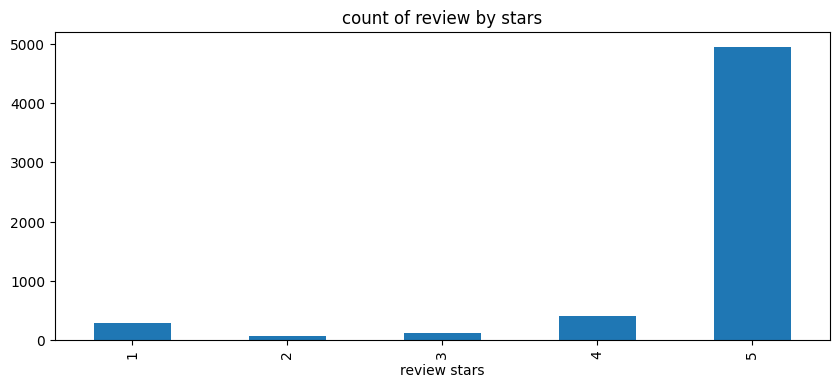

In [18]:
ax = my_df['score'].value_counts().sort_index()\
    .plot(kind='bar',
          title = 'count of review by stars',
          figsize = (10, 4))
ax.set_xlabel('review stars')
plt.show()

In [19]:
def analysis_sentiment(rating):
    analysis = TextBlob(rating)
    if analysis.sentiment.polarity>0:
        return 'Positive'
    elif analysis.sentiment.polarity==0:
        return 'Neutral'
    else:
        return 'Negative'
# my_df['label'] = my_df['rating'].apply(analysis_sentiment)
# my_df

In [20]:
sentence=pd.DataFrame(my_df['clean_lemmatized'])
sentence.columns=['clean_lemmatized']
sentence['sentiment'] = [str(analysis_sentiment(x)) for x in sentence.clean_lemmatized]

In [21]:
sentence.sentiment.value_counts()

sentiment
Neutral     5414
Positive     396
Negative      14
Name: count, dtype: int64

### TF-IDF

In [22]:
my_df.head(2)

,userName,score,at,content,lwr,clean_punct,clean_sw,clean_lemmatized,tokenized
0,Kevin Ditto,5,2023-10-24 23:34:58,"Ga disangka, kemudahan teknologi jaman sekaran...","ga disangka, kemudahan teknologi jaman sekaran...",ga disangka kemudahan teknologi jaman sekarang...,ga disangka kemudahan teknologi jaman memudahk...,ga disangka kemudahan teknologi jaman memudahk...,"[ga, disangka, kemudahan, teknologi, jaman, me..."
1,Adam Gusti Andito,5,2023-10-25 05:29:30,"Disamping perkembangan zaman, karena aplikasi ...","disamping perkembangan zaman, karena aplikasi ...",disamping perkembangan zaman karena aplikasi i...,disamping perkembangan zaman aplikasi mudah ma...,disamping perkembangan zaman aplikasi mudah ma...,"[disamping, perkembangan, zaman, aplikasi, mud..."


In [23]:
df = my_df[['userName','score','at','clean_lemmatized','tokenized']]

In [24]:
df

,userName,score,at,clean_lemmatized,tokenized
0,Kevin Ditto,5,2023-10-24 23:34:58,ga disangka kemudahan teknologi jaman memudahk...,"[ga, disangka, kemudahan, teknologi, jaman, me..."
1,Adam Gusti Andito,5,2023-10-25 05:29:30,disamping perkembangan zaman aplikasi mudah ma...,"[disamping, perkembangan, zaman, aplikasi, mud..."
2,Dominikus Tripuspa Mahardika,5,2023-10-14 17:40:11,aplikasi bagus keren canggih mempermudahkan tu...,"[aplikasi, bagus, keren, canggih, mempermudahk..."
3,Kayla _UwU,5,2023-10-10 18:02:32,aplikasi nya berguna banget tugas dirumah bing...,"[aplikasi, nya, berguna, banget, tugas, diruma..."
4,zahrana putri,4,2023-09-12 15:47:15,terkadang susah memfotonya senter gak bentuk t...,"[terkadang, susah, memfotonya, senter, gak, be..."
...,...,...,...,...,...
5819,Bocil ep Ep,5,2023-08-27 22:59:54,,[]
5820,Ersa Pratiwi,5,2023-10-11 17:34:18,,[]
5821,Fadhlan Arsy,5,2023-09-28 16:45:52,bagus,[bagus]
5822,Angga official,5,2023-09-24 13:49:09,bagus,[bagus]


In [25]:
df.tokenized = df.tokenized.apply(lambda x: None if len(x) == 0 else x)
df.dropna(subset=['tokenized'], inplace=True)

C:\Users\Saintek19\AppData\Local\Temp\ipykernel_18696\2801031019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.tokenized = df.tokenized.apply(lambda x: None if len(x) == 0 else x)
C:\Users\Saintek19\AppData\Local\Temp\ipykernel_18696\2801031019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['tokenized'], inplace=True)


In [26]:
df.isna().sum()

userName            0
score               0
at                  0
clean_lemmatized    0
tokenized           0
dtype: int64

In [27]:
df.tokenized.apply(lambda x: ' '.join(x)).tolist()

['ga disangka kemudahan teknologi jaman memudahkan bentuk soal2 yg pelajari kesulitan lngsung temukan jawabannya apk the best banget kekurangan nya gk jawabannya yg salah terkadang yg salah yg mohon peningkatan kualitas aplikasi aja deh thanks',
 'disamping perkembangan zaman aplikasi mudah materi sulit dipahami aplikasi membantu siswa mahasiswa kekurangan bahan ajar materi buku lengkap guru dipungkiri gurudosen mengajar materi matematika fisika terima kasih developer',
 'aplikasi bagus keren canggih mempermudahkan tugas question ai mudah pahami penjelasan nya semoga kedepan nya canggih fitur fungsi aplikasi nya bagus harap tolong pertahankan segitu penilaian kasih 98 100 puas',
 'aplikasi nya berguna banget tugas dirumah bingung tau mnegerjakannya sengaja iklan membantu tugas gitu iseng2 bagus ngebantu pelajaran mtk bagusnya ga berbayar kisi2 paham langsung botnya ngerti intinya app nya bagus keren sarankan bot nya kemampuan menganalisis gambar sekian',
 'terkadang susah memfotonya se

In [28]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df.tokenized.apply(lambda x: ' '.join(x)).tolist())

In [29]:
X.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.21026891,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [30]:
vectorizer.vocabulary_

{'ga': 1284,
 'disangka': 1095,
 'kemudahan': 1857,
 'teknologi': 3752,
 'jaman': 1630,
 'memudahkan': 2381,
 'bentuk': 547,
 'soal2': 3617,
 'yg': 4147,
 'pelajari': 2947,
 'kesulitan': 1903,
 'lngsung': 2079,
 'temukan': 3765,
 'jawabannya': 1646,
 'apk': 229,
 'the': 3857,
 'best': 632,
 'banget': 441,
 'kekurangan': 1831,
 'nya': 2801,
 'gk': 1382,
 'salah': 3329,
 'terkadang': 3816,
 'mohon': 2608,
 'peningkatan': 3009,
 'kualitas': 1979,
 'aplikasi': 250,
 'aja': 114,
 'deh': 942,
 'thanks': 3851,
 'disamping': 1094,
 'perkembangan': 3052,
 'zaman': 4163,
 'mudah': 2630,
 'materi': 2262,
 'sulit': 3665,
 'dipahami': 1058,
 'membantu': 2312,
 'siswa': 3571,
 'mahasiswa': 2139,
 'bahan': 402,
 'ajar': 118,
 'buku': 808,
 'lengkap': 2060,
 'guru': 1433,
 'dipungkiri': 1079,
 'gurudosen': 1434,
 'mengajar': 2434,
 'matematika': 2249,
 'fisika': 1260,
 'terima': 3796,
 'kasih': 1783,
 'developer': 968,
 'bagus': 354,
 'keren': 1874,
 'canggih': 831,
 'mempermudahkan': 2376,
 'tugas': 

In [31]:
#reverse the key value pair in the dict
vocab = {v:k for k,v in vectorizer.vocabulary_.items()}
vocab

{1284: 'ga',
 1095: 'disangka',
 1857: 'kemudahan',
 3752: 'teknologi',
 1630: 'jaman',
 2381: 'memudahkan',
 547: 'bentuk',
 3617: 'soal2',
 4147: 'yg',
 2947: 'pelajari',
 1903: 'kesulitan',
 2079: 'lngsung',
 3765: 'temukan',
 1646: 'jawabannya',
 229: 'apk',
 3857: 'the',
 632: 'best',
 441: 'banget',
 1831: 'kekurangan',
 2801: 'nya',
 1382: 'gk',
 3329: 'salah',
 3816: 'terkadang',
 2608: 'mohon',
 3009: 'peningkatan',
 1979: 'kualitas',
 250: 'aplikasi',
 114: 'aja',
 942: 'deh',
 3851: 'thanks',
 1094: 'disamping',
 3052: 'perkembangan',
 4163: 'zaman',
 2630: 'mudah',
 2262: 'materi',
 3665: 'sulit',
 1058: 'dipahami',
 2312: 'membantu',
 3571: 'siswa',
 2139: 'mahasiswa',
 402: 'bahan',
 118: 'ajar',
 808: 'buku',
 2060: 'lengkap',
 1433: 'guru',
 1079: 'dipungkiri',
 1434: 'gurudosen',
 2434: 'mengajar',
 2249: 'matematika',
 1260: 'fisika',
 3796: 'terima',
 1783: 'kasih',
 968: 'developer',
 354: 'bagus',
 1874: 'keren',
 831: 'canggih',
 2376: 'mempermudahkan',
 3937: 'tu

In [32]:
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df_tfidf.iloc[:15, -15:].head(3)

,yng,yoga,yogyakarta,you,your,youtube,youtuber,youu,youuu,ytuz,yu,yuk,yws,zaman,zas
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210269,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [33]:
df_tfidf

,05,08,0nilai,10,100,1000,1000000,1000000000,10000000000,10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000,...,youtube,youtuber,youu,youuu,ytuz,yu,yuk,yws,zaman,zas
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210269,0.0
2,0.0,0.0,0.0,0.0,0.159476,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5660,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5661,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5662,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5663,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


### Split Data (TF-IDF)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df['clean_lemmatized']
Y = df['clean_lemmatized']

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

c:\Users\Saintek19\anaconda3\envs\fuzzy\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Saintek19\anaconda3\envs\fuzzy\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Saintek19\anaconda3\envs\fuzzy\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Saintek19\anaconda3\envs\fuzzy\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` i

In [35]:
y_train

array([2819, 2117,  720, ...,  973,  922, 1159])